In [171]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [172]:
path = os.path.join(os.path.join(os.path.dirname(os.getcwd()), "data"), "adult.csv")
df = pd.read_csv(path)
df.replace("?", np.nan, inplace=True)
df = df.dropna()
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 1
Print the count of men and women in the dataset.

In [173]:
men_count = df[df["sex"] == "Male"].shape[0]
women_count = df[df["sex"] == "Female"].shape[0]

print("Men in company: ", men_count)
print("Women in company: ", women_count)

Men in company:  20380
Women in company:  9782


# Task 2
Find the average age of men in dataset

In [174]:
avg_men_age = df[df["sex"] == "Male"].age.mean().round()
avg_men_age

39.0

# Task 3
Get the percentage of people from Poland (native-country)

In [175]:
people = df[df["native-country"] == "Poland"].shape[0] / df.shape[0] * 100
print(f"Percentage of people from Poland: {people:.2f}%")

Percentage of people from Poland: 0.19%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [176]:
result = df.groupby('salary')['age'].agg(['mean', 'std']).round()
result

,mean,std
salary,,
<=50K,37.0,13.0
>50K,44.0,10.0


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [177]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
people = df[(df["salary"] == ">50K") & ~(df["education"].isin(higher_education))]
len(people)

3178

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [178]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [179]:
married = df[df["marital-status"].str.startswith("Married")]
unmarried = df[~df["marital-status"].str.startswith("Married")]
married_high_salary = married[married["salary"] == ">50K"].shape[0] * 100 / married.shape[0]
unmarried_high_salary = unmarried[unmarried["salary"] == ">50K"].shape[0] * 100 / unmarried.shape[0]
print("Married with salary:\n => 50k: ", str(married_high_salary.__round__())+"%\n  < 50k: ", str(100 - married_high_salary.__round__())+"%")
print("Unmarried with salary:\n => 50k: ", str(unmarried_high_salary.__round__())+"%\n  < 50k: ", str(100 - unmarried_high_salary.__round__())+"%")

Married with salary:
 => 50k:  45%
  < 50k:  55%
Unmarried with salary:
 => 50k:  7%
  < 50k:  93%


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [180]:
max_hours = df["hours-per-week"].max()
hard_workers = df[df["hours-per-week"] == max_hours].shape[0]
print(f"Max hours per week some person works - {max_hours}")
print(f"People works max hours per week - {hard_workers}")

Max hours per week some person works - 99
People works max hours per week - 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Correlation Matrix:
                     age  hours-per-week  salary K$
age             1.000000        0.101599   0.208203
hours-per-week  0.101599        1.000000   0.196378
salary K$       0.208203        0.196378   1.000000 


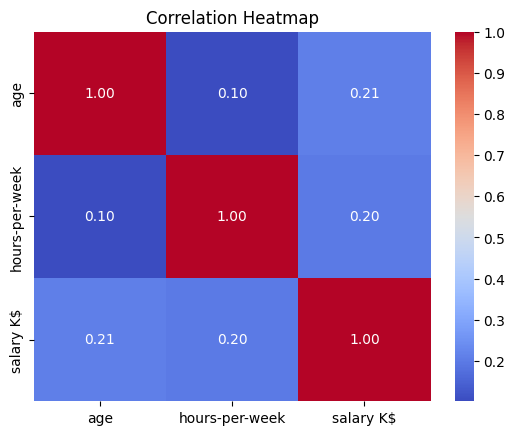

In [184]:
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix,"\n")

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()